# Part 3 - EDA and Preliminary Analysis

### Load CSV of Friends Transcript

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('friends_transcripts_clean.csv')

In [6]:
df.drop(axis=1, columns=['Unnamed: 0', 'Line'], inplace=True)

In [7]:
df.head()

,Season,Episode,Title,Character,Clean_Lines
0,1,101,The One Where Monica Gets a New Roomate (The P...,Monica,There's nothing to tell! He's just some guy I...
1,1,101,The One Where Monica Gets a New Roomate (The P...,Joey,"C'mon, you're going out with the guy! There's..."
2,1,101,The One Where Monica Gets a New Roomate (The P...,Chandler,"All right Joey, be nice. So does he have a h..."
3,1,101,The One Where Monica Gets a New Roomate (The P...,Phoebe,"Wait, does he eat chalk?"
4,1,101,The One Where Monica Gets a New Roomate (The P...,Phoebe,"Just, 'cause, I don't want her to go through ..."


#### Plot the number of lines per character

In [7]:
line_count = df.groupby('Character').count()[['Clean_Lines']]

In [8]:
line_count.sort_values(by='Clean_Lines', ascending=False, inplace=True)

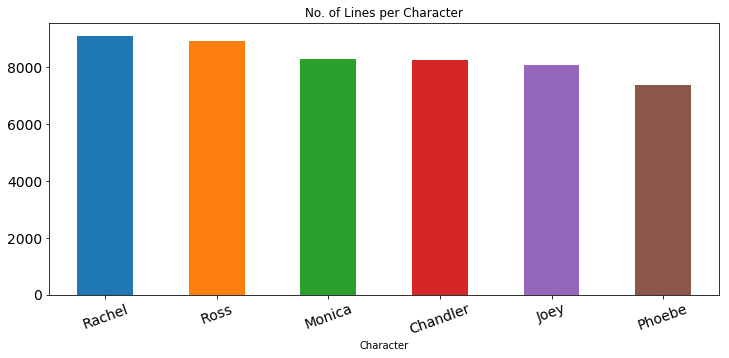

In [9]:
line_count.plot(y='Clean_Lines', kind='bar', figsize=(12,5), 
                title='No. of Lines per Character', 
                use_index=True, fontsize=14, legend=False, rot=20);

#### Plot Characters with Most Lines per Season

In [10]:
season_linecount = df.groupby(['Season', 'Character']).count()[['Clean_Lines']]

In [11]:
scount = season_linecount.sort_values(by=['Season','Clean_Lines'], ascending=False)

In [12]:
scount

Clean_Lines
Season Character             
10     Ross               969
       Rachel             836
       Joey               814
       Phoebe             765
       Chandler           759
       Monica             750
9      Chandler           892
       Monica             890
       Ross               864
       Joey               862
       Rachel             855
       Phoebe             782
8      Rachel            1072
       Ross               969
       Joey               870
       Monica             807
       Phoebe             759
       Chandler           654
7      Rachel            1091
       Joey               934
       Monica             899
       Chandler           847
       Ross               822
       Phoebe             800
6      Chandler          1001
       Rachel             950
       Ross               876
       Joey               872
       Monica             870
       Phoebe             761
5      Chandler           941
       Joey               931
       Rachel             906
       Monica             898
       Ross               870
       Phoebe             813
4      Rachel             887
       Chandler           864
       Ross               782
       Joey               778
       Monica             734
       Phoebe             679
3      Ross               998
       Rachel             881
       Monica             815
       Chandler           783
       Phoebe             763
       Joey               741
2      Ross               852
       Rachel             782
       Monica             762
       Chandler           747
       Phoebe             646
       Joey               644
1      Ross               922
       Monica             854
       Rachel             828
       Chandler           765
       Joey               614
       Phoebe             601

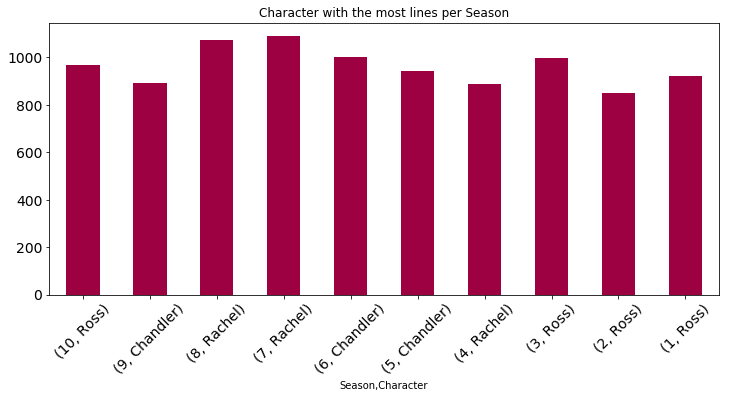

In [13]:
scount.take(indices=[0,6,12,18,24, 30, 36, 42, 48, 54]).plot(kind='bar', figsize=(12,5), colormap='Spectral',
                                                             title='Character with the most lines per Season', 
                                                             use_index=True, fontsize=14, legend=False, rot=45);

#### Lines by season

In [14]:
season_total = df.groupby('Season').count()[['Clean_Lines']].sort_values(by='Clean_Lines', ascending=False)

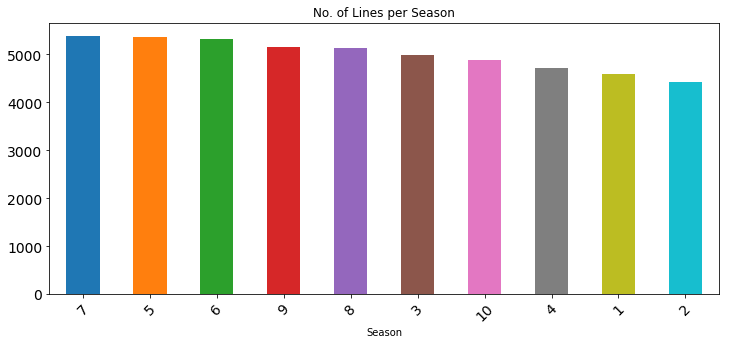

In [15]:
season_total.plot(y='Clean_Lines', kind='bar', figsize=(12,5), 
                title='No. of Lines per Season', 
                use_index=True, fontsize=14, legend=False, rot=45);

#### Based on data from Business Insider
http://uk.businessinsider.com/how-friends-cast-got-1-million-per-episode-salary-2016-10/#david-schwimmer-and-jennifer-aniston-took-a-loss-so-they-could-band-with-their-costars-2

I obtained the salary per episode information from the article above, I was able to calculate and plot the total salary per season for the main characters.

In [1]:
# Based on data from http://uk.businessinsider.com/how-friends-cast-got-1-million-per-episode-salary-2016-10/#david-schwimmer-and-jennifer-aniston-took-a-loss-so-they-could-band-with-their-costars-2
Salary_data = {1:22500,
               2:30750,
               3:75000,
               4:85000,
               5:100000,
               6:125000,
               7:750000,
               8:750000,
               9:1000000,
               10:1000000}

In [8]:
len(set(df[df.Season == 1]['Episode']))
#.count()[['Episode']].sort_values(by='Episode', ascending=False)

23

In [9]:
Salary_data[1]

22500

In [10]:
sal_per_season = []
season = []
for i in set(df.Season):
    season.append('season_'+str(i))
    sal_per_season.append((Salary_data[i]*len(set(df[df.Season == i]['Episode'])))*6)

In [11]:
sal_per_season

[3105000,
 4243500,
 10800000,
 11730000,
 13800000,
 16500000,
 103500000,
 103500000,
 132000000,
 102000000]

In [12]:
salary_per_season = pd.DataFrame(data = [season, sal_per_season])

In [17]:
salary_per_season.T

,0,1
0,season_1,3105000
1,season_2,4243500
2,season_3,10800000
3,season_4,11730000
4,season_5,13800000
5,season_6,16500000
6,season_7,103500000
7,season_8,103500000
8,season_9,132000000
9,season_10,102000000


In [16]:
salary_per_season.T.to_csv('salary_per_season.csv')

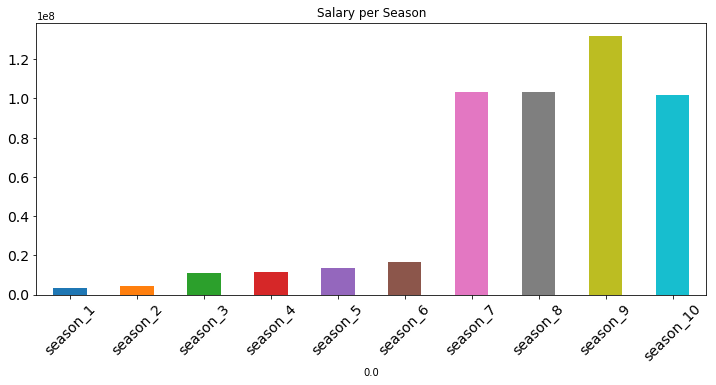

In [22]:
salary_per_season.T.plot(y=1., x=0., kind='bar', figsize=(12,5), 
                       title='Salary per Season', 
                       fontsize=14, legend=False, rot=45);